In [1]:
# ndvi + mask

%matplotlib inline

from datetime import datetime
from datacube.analytics.analytics_engine import AnalyticsEngine
from datacube.execution.execution_engine import ExecutionEngine
from datacube.analytics.utils.analytics_utils import plot

In [2]:
# initialise AE/EE

a = AnalyticsEngine()
e = ExecutionEngine()

DEBUG:datacube.analytics.analytics_engine:Initialise Analytics Module.
DEBUG:datacube.execution.execution_engine:Initialise Execution Module.


In [3]:
# Lake Burley Griffin
dimensions = {'longitude': {'range': (149.07, 149.18)},
              'latitude':  {'range': (-35.32, -35.28)},
              'time':      {'range': (datetime(1990, 1, 1), datetime(1990, 12, 31))}}

b40 = a.create_array(('LANDSAT 5', 'NBAR'), ['band_40'], dimensions, 'b40')
b30 = a.create_array(('LANDSAT 5', 'NBAR'), ['band_30'], dimensions, 'b30')
pq = a.create_array(('LANDSAT 5', 'PQ'), ['band_pixelquality'], dimensions, 'pq')

ndvi = a.apply_expression([b40, b30], '((array1 - array2) / (array1 + array2))', 'ndvi')
mask = a.apply_expression([ndvi, pq], 'array1{array2}', 'mask')

DEBUG:datacube.analytics.analytics_engine:variable = band_40
DEBUG:datacube.analytics.analytics_engine:variable = band_30
DEBUG:datacube.analytics.analytics_engine:variable = band_pixelquality
DEBUG:datacube.analytics.analytics_engine:function before = ((array1 - array2) / (array1 + array2))
DEBUG:datacube.analytics.analytics_engine:function after = ((b40 - b30) / (b40 + b30))
DEBUG:datacube.analytics.analytics_engine:function before = array1{array2}
DEBUG:datacube.analytics.analytics_engine:function after = ndvi{pq}


In [4]:
e.execute_plan(a.plan)

plot3D


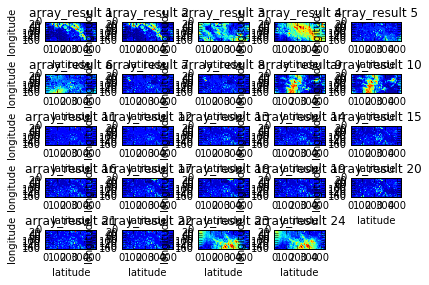

In [5]:
plot(e.cache['b30'])

plot3D


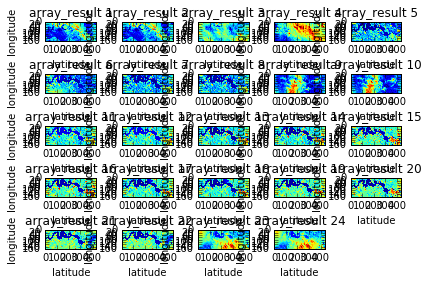

In [6]:
plot(e.cache['b40'])

plot3D


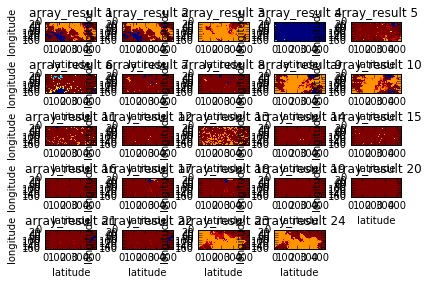

In [7]:
plot(e.cache['pq'])

plot3D


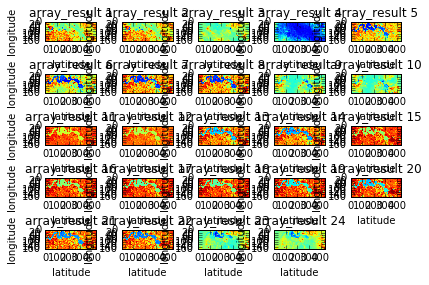

In [8]:
plot(e.cache['ndvi'])

plot3D


/home/rc/miniconda/lib/python2.7/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


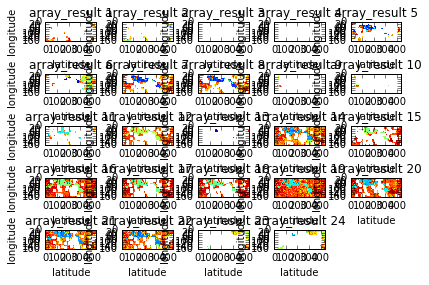

In [9]:
plot(e.cache['mask'])